# Figure 3: Distorted Geometries
This notebook reproduces figure with the 3D plots which demonstrate the distorted geometries used to determine the robustness of the results with respect to irregularities which may arise during fabrication processes.

The 3D plots were created using Paraview (http://www.paraview.org/). The VTK files are located in the directory, `data/figure_3/3d_data/vtk/`. The images were combined with a image editing programme.

The 3D plots were created from the simulations of a nanocylinder with thickness, $t=70$nm.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib._png import read_png

## Figure 3(i): Added surface roughness
The first figure, 3(i) demonstrates how surface roughness was introduced to the perfect cylinder.

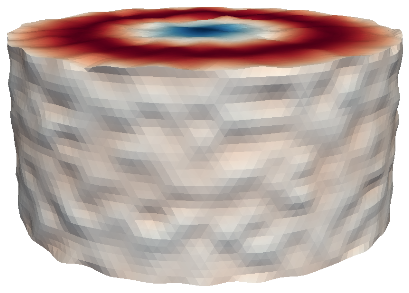

In [2]:
# load the image
imageFileName = '../data/figure_3/3d_data/images/rough.png'
imRead = read_png(imageFileName)

# and plot
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)

ax.imshow(imRead)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

## Figure 3(ii): Tapered cone
The first figure, 3(i) demonstrates how the cylinder was tapered the cylinder to form a truncated cone.

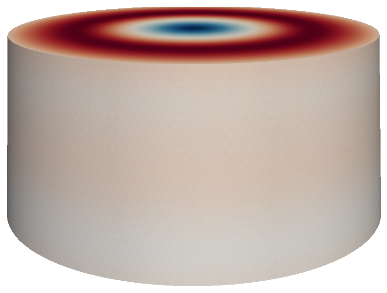

In [3]:
# load the image
imageFileName = '../data/figure_3/3d_data/images/truncated_cone.png'
imRead = read_png(imageFileName)

# and plot
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)

ax.imshow(imRead)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

## Hysteresis Data
The data produced from the hysteresis of these distorted geometries are located in the directory, `data/figure_3/hysteresis_loops/`

In [4]:
# define colours used in plots
dark_purple = '#8464c5'
light_purple = '#ededfb'
dark_green = '#336433'
light_green = '#a0d9a0'
white = '#FFFFFF'
olive = '#aaa460'

In [5]:
def base_plot(mz, mz_original, H_up):
    """
    Function to plot the mz vs. H hysteresis curves.
    Adds colour shading to the different regions occuring throughout the hysteresis.
    
    Requires the values of mz, dmdH_scaled and H, the array of field steps on the hysteresis loop.
    
    The plot is returned
    """
    
    # create the figure and define an axis paramerter.
    fig = plt.figure(figsize=(9, 5))
    ax = fig.add_subplot(111)

    # plot mz vs. H values.
    ax.plot(H_up[0:400], mz[0:400], 'r--', linewidth=2.5, label="Distorted")
    ax.plot(H_up[0:400], mz_original[0:400], 'b-.', linewidth=2.5, label="Original")
    
    # add axis labels
    plt.ylabel(r'm$_{\mathrm{z}}$', fontsize=20)
    plt.xlabel(r'H ($\times$M$_{\mathrm{s}}$)', fontsize=20)
    plt.xticks([-4, -3 ,-2, -1, 0, 1, 2, 3, 4], fontsize=18)
    plt.yticks([-1, -0.5, 0, 0.5, 1], fontsize=18)
    plt.xlim([-3, 3])

    # add the legend
    plt.legend(loc='lower right', fontsize=16)

    plt.tight_layout()
    return plt, ax

The plots are produced below, showing the results for t=70nm. The original data from the smooth, regular cylinder is also included in the plot for comparison.

Data is shown for increasing field values only.

## Hysteresis of rough surface cylinder


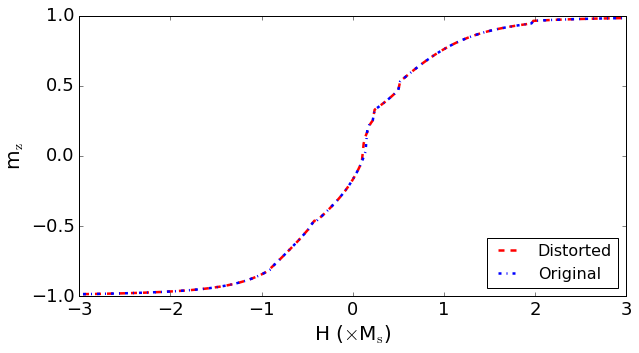

In [6]:
mx, my, mz_original, energy = np.load('../data/figure_1/hysteresis_loops/sim_hysteresis_FeGe_nanodisk_d150_h70.npy')

mx, my, mz, energy = np.load('../data/figure_3/hysteresis_loops/sim_hysteresis_FeGe_rough_disk_d150_h70.npy')
                             
# create arrays for the Zeeman field
H_up = np.linspace(-4, 4, 400, endpoint=False)
plt, ax = base_plot(mz, mz_original, H_up)
plt.savefig('pdfs/figure-3-rough-comparison.pdf')

plt.show()

## Hysteresis of tapered cylinder

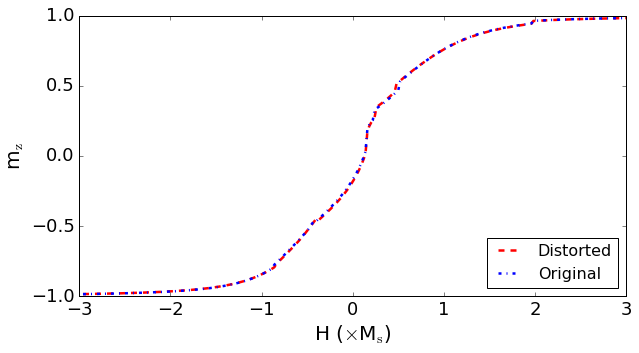

In [7]:
mx, my, mz_original, energy = np.load('../data/figure_1/hysteresis_loops/sim_hysteresis_FeGe_nanodisk_d150_h70.npy')

mx, my, mz, energy = np.load('../data/figure_3/hysteresis_loops/sim_hysteresis_FeGe_cutcone_d150_d140_h70.npy')
                             
# create arrays for the Zeeman field
H_up = np.linspace(-4, 4, 400, endpoint=False)
plt, ax = base_plot(mz, mz_original, H_up)
plt.savefig('pdfs/figure-3-tapered-cylinder-comparison.pdf')

plt.show()